In [1]:
import warnings

# 减少代码执行过程中的不必要提醒
warnings.filterwarnings("ignore")

In [2]:
import numpy as np

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

Text(0, 0.5, 'Price')

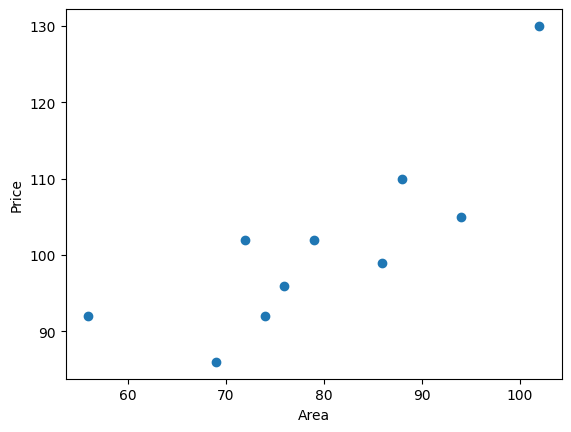

In [3]:
from matplotlib import pyplot as plt

%matplotlib inline

plt.scatter(x, y)
plt.xlabel("Area")
plt.ylabel("Price")

In [4]:
def f(x: list, w0: float, w1: float):
    """一元一次函数表达式"""
    y = w0 + w1 * x
    return y

In [5]:
def square_loss(x: np.ndarray, y: np.ndarray, w0: float, w1: float):
    """平方损失函数"""
    loss = sum(np.square(y - (w0 + w1 * x)))
    return loss

In [6]:
def least_squares_algebraic(x: np.ndarray, y: np.ndarray):
    """最小二乘法代数求解"""
    n = x.shape[0]
    w1 = (n * sum(x * y) - sum(x) * sum(y)) / (n * sum(x * x) - sum(x) * sum(x))
    w0 = (sum(x * x) * sum(y) - sum(x) * sum(x * y)) / (
        n * sum(x * x) - sum(x) * sum(x)
    )
    return w0, w1

In [7]:
least_squares_algebraic(x, y)

(41.33509168550616, 0.7545842753077117)

In [8]:
w0 = least_squares_algebraic(x, y)[0]
w1 = least_squares_algebraic(x, y)[1]

square_loss(x, y, w0, w1)

447.69153479025357

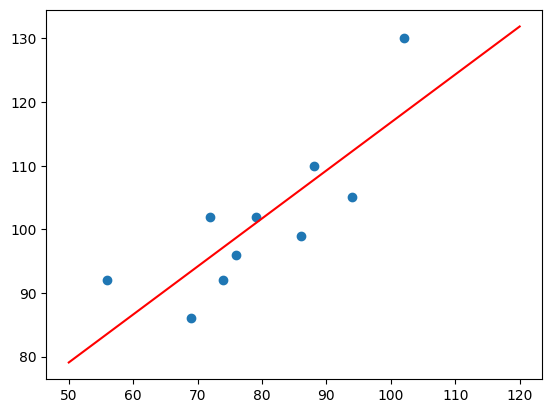

In [9]:
x_temp = np.linspace(50, 120, 100)  # 绘制直线生成的临时点

plt.scatter(x, y)
plt.plot(x_temp, x_temp * w1 + w0, "r")

In [10]:
f(150, w0, w1)

154.5227329816629

In [11]:
def least_squares_matrix(x: np.matrix, y: np.matrix):
    """最小二乘法矩阵求解"""
    w = (x.T * x).I * x.T * y
    return w

In [23]:

x_matrix = np.matrix(np.hstack((np.ones((x.shape[0], 1)), x.reshape(x.shape[0], 1))))
y_matrix = np.matrix(y.reshape(y.shape[0], 1))
x_matrix, y_matrix

(matrix([[  1.,  56.],
         [  1.,  72.],
         [  1.,  69.],
         [  1.,  88.],
         [  1., 102.],
         [  1.,  86.],
         [  1.,  76.],
         [  1.,  79.],
         [  1.,  94.],
         [  1.,  74.]]),
 matrix([[ 92],
         [102],
         [ 86],
         [110],
         [130],
         [ 99],
         [ 96],
         [102],
         [105],
         [ 92]]))

In [25]:
least_squares_matrix(x_matrix, y_matrix)


(41.33509168550616, 0.7545842753077117)

In [26]:
least_squares_algebraic(x, y)

(41.33509168550616, 0.7545842753077117)

In [28]:
from sklearn.linear_model import LinearRegression


In [33]:
# 定义线性回归模型
model = LinearRegression()
model.fit(x.reshape(-1,1),y)
# 得到模型拟合参数  intercept_ 截距项   coef_ 系数
model.intercept_, model.coef_

(41.335091685506185, array([0.75458428]))

In [36]:
import pandas as pd

波士顿房价数据集 是机器学习中非常经典的数据集，它被用于多篇回归算法研究的学术论文中。该数据集共计 506 条，其中包含有 13 个与房价相关的特征以及 1 个目标值（房价）

CRIM: 城镇犯罪率。
ZN: 占地面积超过 2.5 万平方英尺的住宅用地比例。
INDUS: 城镇非零售业务地区的比例。
CHAS: 查尔斯河是否经过 (=1 经过，=0 不经过)。
NOX: 一氧化氮浓度（每 1000 万份）。
RM: 住宅平均房间数。
AGE: 所有者年龄。
DIS: 与就业中心的距离。
RAD: 公路可达性指数。
TAX: 物业税率。
PTRATIO: 城镇师生比例。
BLACK: 城镇的黑人指数。
LSTAT: 人口中地位较低人群的百分数。
MEDV: 城镇住房价格中位数。

In [38]:
df = pd.read_csv('./data/course-5-boston.csv')
df.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2


这里，仅选取 CRIM, RM, LSTAT 三个特征用于线性回归模型训练。
我们将这三个特征的数据单独拿出来，并且使用 describe() 方法查看其描述信息。 
describe() 统计了每列数据的个数、最大值、最小值、平均数等信息。

In [44]:
features = df[["crim", "rm", "lstat"]] # 注意这种写法 df["crim"] 一列
features.shape

(506, 3)

In [45]:
features.describe()

,crim,rm,lstat
count,506.000000,506.000000,506.000000
mean,3.593761,6.284634,12.653063
std,8.596783,0.702617,7.141062
min,0.006320,3.561000,1.730000
25%,0.082045,5.885500,6.950000
50%,0.256510,6.208500,11.360000
75%,3.647423,6.623500,16.955000
max,88.976200,8.780000,37.970000


In [47]:
target = df["medv"]  # 目标值数据
target.shape

(506,)

In [65]:
split_num = int(len(features)*0.7)
X_train = features[:split_num]  # 训练集特征  == features[:split_num,:]
y_train = target[:split_num]  # 训练集目标

X_test = features[split_num:]  # 测试集特征
y_test = target[split_num:]  # 测试集目标


X_train.shape, y_train.shape, X_test.shape, y_test.shape


((354, 3), (354,), (152, 3), (152,))

In [66]:
model = LinearRegression()  # 建立模型
model.fit(X_train, y_train)  # 训练模型
model.coef_, # 输出训练后的模型参数和截距项

(array([ 0.69979497, 10.13564218, -0.20532653]), -38.000969889690325)

In [68]:
preds = model.predict(X_test) 
preds  

array([17.77439141, 21.09512448, 27.63412265, 26.78577951, 25.38313368,
       24.3286313 , 28.4257879 , 25.12834727, 16.82806601, 20.76498858,
       52.3350748 , -0.18169806, 12.01475786,  7.87878077, 15.13155699,
       32.93748235, 37.07872049, 29.50613719, 25.50800832, 12.35867972,
        9.08901644, 47.08374238, 35.31759193, 33.3738765 , 38.34913316,
       33.10414639, 91.3556125 , 35.11735022, 19.69326952, 18.49805269,
       14.03767555, 20.9235166 , 20.41406182, 21.92218226, 15.20451678,
       18.05362998, 21.26289453, 23.18192502, 15.87149504, 27.70381826,
       27.65958772, 30.17151829, 27.04987446, 21.52730227, 37.82614512,
       22.09872387, 34.71166346, 32.07959454, 29.45253042, 29.51137956,
       41.49935191, 62.4121152 , 13.64508882, 24.71242033, 18.69151684,
       37.4909413 , 54.05864658, 34.94758034, 15.01355249, 30.17849355,
       32.22191275, 33.90252834, 33.02530285, 28.4416789 , 69.60201087,
       34.7617152 , 31.65353442, 24.5644437 , 24.78130285, 24.00

平均绝对误差（MAE）:  $\mathrm{MAE}(y,\hat{y})=\frac1n\sum_{i=1}^n|y_i-\hat{y}_i|$
均方误差（MSE） : $ \mathrm{MSE}(y,\hat{y})=\frac1n\sum_{i=1}^n(y_i-\hat{y_i})^2 $

In [70]:
def mae_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MAE 求解"""
    n = len(y_true)
    mae = sum(np.abs(y_true - y_pred)) / n
    return mae

def mse_solver(y_true: np.ndarray, y_pred: np.ndarray):
    """MSE 求解"""
    n = len(y_true)
    mse = sum(np.square(y_true - y_pred)) / n
    return mse

In [90]:
mae = mae_solver(y_test.values, preds)
mse = mse_solver(y_test.values, preds)

print("MAE: ", mae)
print("MSE: ", mse)

MAE:  13.0220630727803
MSE:  303.8331247223644


In [92]:
from sklearn.metrics import mean_absolute_error, mean_squared_error


mae_ = mean_absolute_error(y_test.values, preds)
mse_ = mean_squared_error(y_test.values, preds)

print("scikit-learn MAE: ", mae_)
print("scikit-learn MSE: ", mse_)

scikit-learn MAE:  13.022063072780297
scikit-learn MSE:  303.83312472236446


In [94]:
a = np.random.randint(1,10,(2,2))
b = np.random.randint(1,10,(2,2))
a,b

(array([[6, 7],
        [9, 6]]),
 array([[7, 9],
        [1, 6]]))

In [97]:
da = pd.DataFrame(data=a)
db = pd.DataFrame(data=b)
da,db

(   0  1
 0  6  7
 1  9  6,
    0  1
 0  7  9
 1  1  6)

In [99]:
pd.concat([da,db],axis=1)

,0,1,0,1
0,6,7,7,9
1,9,6,1,6


In [88]:
c = a - b
c 

array([[-3],
       [ 4],
       [ 2],
       [ 4],
       [ 3],
       [-1]])

In [89]:
sum(c)


array([9])

In [100]:


import numpy as np

x = np.array([56, 72, 69, 88, 102, 86, 76, 79, 94, 74])
y = np.array([92, 102, 86, 110, 130, 99, 96, 102, 105, 92])

In [101]:
model = LinearRegression()
model.fit(x.reshape(-1,1),y)
# 得到模型拟合参数  intercept_ 截距项   coef_ 系数
model.intercept_, model.coef_

(41.335091685506185, array([0.75458428]))

In [114]:
y_pre = model.predict(x.reshape(-1,1))
y.mean(),y_pre.mean()

(101.4, 101.4)

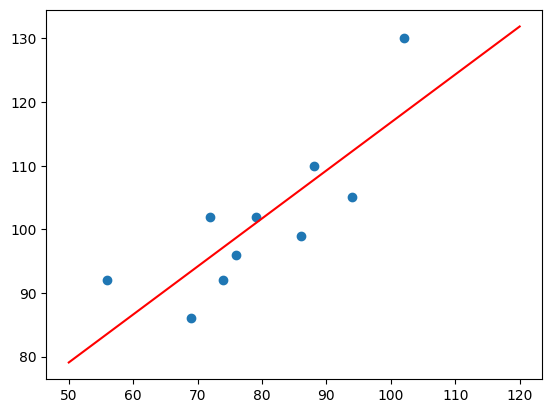

In [112]:
x_temp = np.linspace(50, 120, 100)  # 绘制直线生成的临时点
plt.scatter(x, y)
plt.plot(x_temp, model.predict(x_temp.reshape(-1, 1)), "r")

In [109]:
model.predict(x_temp.reshape(-1, 1))

array([ 79.06430545,  79.59784989,  80.13139433,  80.66493876,
        81.1984832 ,  81.73202764,  82.26557207,  82.79911651,
        83.33266095,  83.86620538,  84.39974982,  84.93329426,
        85.4668387 ,  86.00038313,  86.53392757,  87.06747201,
        87.60101644,  88.13456088,  88.66810532,  89.20164976,
        89.73519419,  90.26873863,  90.80228307,  91.3358275 ,
        91.86937194,  92.40291638,  92.93646082,  93.47000525,
        94.00354969,  94.53709413,  95.07063856,  95.604183  ,
        96.13772744,  96.67127187,  97.20481631,  97.73836075,
        98.27190519,  98.80544962,  99.33899406,  99.8725385 ,
       100.40608293, 100.93962737, 101.47317181, 102.00671625,
       102.54026068, 103.07380512, 103.60734956, 104.14089399,
       104.67443843, 105.20798287, 105.74152731, 106.27507174,
       106.80861618, 107.34216062, 107.87570505, 108.40924949,
       108.94279393, 109.47633836, 110.0098828 , 110.54342724,
       111.07697168, 111.61051611, 112.14406055, 112.67